#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import GridSearchCV


#### Load the test, train and submission data with encoding as latin-1 as there was error with default utf encoding

In [2]:
train = pd.read_csv("train.csv", encoding='latin-1')
test = pd.read_csv("test.csv",encoding='latin-1')
sample_soln = pd.read_csv("solution.csv",encoding='latin-1')

In [3]:
train.head()

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,1,03/04/16 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94,Other,50000.0,7,petrol,subaru,No,03/04/16 0:00,0,34474,07/04/16 13:15
1,2,08/03/16 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140,passat,150000.0,5,diesel,volkswagen,No,08/03/16 0:00,0,50765,11/03/16 17:15
2,3,26/03/16 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990,limousine,2007,automatic,150,c_klasse,150000.0,2,diesel,mercedes_benz,No,26/03/16 0:00,0,90475,26/03/16 17:38
3,4,11/03/16 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000,limousine,2005,manual,150,147,150000.0,9,diesel,alfa_romeo,No,11/03/16 0:00,0,40699,12/03/16 2:45
4,5,17/03/16 17:49,Audi_A4,private,offer,12950,Combi,2005,manual,200,a4,125000.0,3,petrol,audi,No,17/03/16 0:00,0,84347,07/04/16 4:17


####  check the count of NAs for each column in train data to replace them with appropriate value

In [4]:
train.isna().sum()

x1        0
x2        0
x3        0
x4        0
x5        0
y         0
x6     1844
x7        0
x8     1719
x9        0
x10       0
x11       0
x12       0
x13    2085
x14       0
x15    6849
x16       0
x17       0
x18       0
x19       0
dtype: int64

#### Know the data type of each column in train data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Data columns (total 20 columns):
x1     58857 non-null int64
x2     58857 non-null object
x3     58857 non-null object
x4     58857 non-null object
x5     58857 non-null object
y      58857 non-null int64
x6     57013 non-null object
x7     58857 non-null int64
x8     57138 non-null object
x9     58857 non-null int64
x10    58857 non-null object
x11    58857 non-null float64
x12    58857 non-null int64
x13    56772 non-null object
x14    58857 non-null object
x15    52008 non-null object
x16    58857 non-null object
x17    58857 non-null int64
x18    58857 non-null int64
x19    58857 non-null object
dtypes: float64(1), int64(7), object(12)
memory usage: 9.0+ MB


#### Find unique values in each column

In [6]:
train.nunique()

x1     58857
x2     12358
x3     40839
x4         1
x5         1
y       2358
x6         8
x7        17
x8         2
x9       402
x10      235
x11       13
x12       13
x13        7
x14       38
x15        2
x16       77
x17        1
x18     7121
x19    10739
dtype: int64

In [7]:
train.shape

(58857, 20)

In [8]:
def applymode(x):
    a = x.mode()[0]
    print(a)
    return x.fillna(a)

#### Replace NA values with mean or mode based on numerical or categorical value

In [9]:
train.x13 = train.groupby("x14").x13.transform(applymode)

petrol
diesel
diesel
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
diesel
petrol
petrol
petrol
diesel
petrol
diesel
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
diesel
diesel


In [11]:
train.x6 = train.groupby("x14").x6.transform(applymode)

limousine
Combi
limousine
Small Car
Combi
bus
Combi
Small Car
Small Car
Small Car
Small Car
limousine
Small Car
limousine
suv
suv
suv
Small Car
suv
limousine
limousine
Small Car
limousine
Small Car
Small Car
Small Car
cabrio
Small Car
limousine
limousine
Small Car
Combi
Small Car
Combi
Small Car
Small Car
limousine
Combi


In [12]:
train.x8 = train.groupby("x14").x8.transform(applymode)

manual
manual
manual
manual
automatic
manual
manual
manual
manual
manual
manual
manual
manual
automatic
automatic
manual
manual
manual
automatic
manual
automatic
manual
manual
manual
manual
manual
automatic
manual
manual
manual
manual
manual
automatic
manual
manual
manual
manual
manual


In [13]:
train.x15 = train.groupby("x8").x15.transform(applymode)

No
No


#### Do similar preprocessing for test data

In [14]:
test.isna().sum()

x1        0
x2        0
x3        0
x4        0
x5        0
x6      636
x7        0
x8      505
x9        0
x10       0
x11       0
x12       0
x13     754
x14       0
x15    2249
x16       0
x17       0
x18       0
x19       0
dtype: int64

In [15]:
test.x6 = test.groupby("x14").x6.transform(applymode)

limousine
Combi
limousine
Small Car
Combi
Small Car
Small Car
Small Car
Small Car
Small Car
Small Car
limousine
suv
limousine
suv
Small Car
suv
Small Car
suv
limousine
limousine
Small Car
limousine
Small Car
Small Car
Small Car
suv
Small Car
limousine
Small Car
Combi
Small Car
Combi
Small Car
Small Car
limousine
Combi


In [16]:
test.x8 = test.groupby("x14").x8.transform(applymode)

manual
manual
manual
manual
automatic
manual
manual
manual
manual
manual
manual
manual
manual
automatic
automatic
manual
manual
manual
manual
manual
automatic
manual
manual
manual
manual
manual
automatic
manual
manual
manual
manual
automatic
manual
manual
manual
manual
manual


In [17]:
test.x13 = test.groupby("x14").x13.transform(applymode)

petrol
diesel
diesel
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
diesel
petrol
petrol
petrol
diesel
petrol
diesel
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
diesel
diesel


In [18]:
test.x15 = test.groupby("x8").x15.transform(applymode)

No
No


### Remove date, id and name columns as they are insignificant

In [135]:
test_updated = test.drop(columns=["x2","x3","x10", "x16", "x19"])
train_updated = train.drop(columns=["x2","x3","x10", "x16", "x19"])

### Add new column - source to identify train and test data post merging

In [136]:
train_updated["source"] = "train"
test_updated["source"] = "test"

### Merge both train and test data into a dataframe

In [137]:
dataf = pd.concat([train_updated,test_updated],axis=0,sort=False)

### Differentiate category columns and numeric columns

In [138]:
dataf_col_category = dataf.select_dtypes(exclude=[np.number]).columns
#test_column_category = test_updated.select_dtypes(exclude=[np.number]).columns

In [139]:
dataf_col_Integer = dataf.columns.difference(dataf_col_category)
#test_column_Integer = test_updated.columns.difference(test_column_category)

### Find unique values in category column to proceed with one hot encoding

In [140]:
dataf[dataf_col_category].nunique()


x4         1
x5         1
x6         8
x8         2
x13        7
x14       38
x15        2
source     2
dtype: int64

In [141]:
dataf_one_hot = pd.get_dummies(dataf[dataf_col_category])

### Merge encoded columns with numeric columns

In [142]:
data_model = pd.concat([dataf_one_hot,dataf[dataf_col_Integer]],axis=1)
data_model

,x4_private,x5_offer,x6_Combi,x6_Other,x6_Small Car,x6_bus,x6_cabrio,x6_coupe,x6_limousine,x6_suv,...,source_test,source_train,x1,x11,x12,x17,x18,x7,x9,y
0,1,1,0,0,1,0,0,0,0,0,...,0,1,1,50000.0,7,0,34474,2004,94,3850.0
1,1,1,1,0,0,0,0,0,0,0,...,0,1,2,150000.0,5,0,50765,2007,140,5999.0
2,1,1,0,0,0,0,0,0,1,0,...,0,1,3,150000.0,2,0,90475,2007,150,5990.0
3,1,1,0,0,0,0,0,0,1,0,...,0,1,4,150000.0,9,0,40699,2005,150,4000.0
4,1,1,1,0,0,0,0,0,0,0,...,0,1,5,125000.0,3,0,84347,2005,200,12950.0
5,1,1,0,0,0,0,0,0,1,0,...,0,1,6,150000.0,5,0,45884,2000,129,3600.0
6,1,1,1,0,0,0,0,0,0,0,...,0,1,7,150000.0,7,0,58849,2003,131,4450.0
7,1,1,0,0,0,1,0,0,0,0,...,0,1,8,80000.0,8,0,6116,2010,146,10500.0
8,1,1,0,0,0,0,0,1,0,0,...,0,1,9,150000.0,12,0,10627,2004,333,10900.0
9,1,1,0,0,0,0,0,0,1,0,...,0,1,10,30000.0,10,0,10405,2013,122,17250.0


### Differentiate train and test data frame based on source column

In [143]:
train_modified = data_model.loc[data_model.source_train==1.0,:]

In [144]:
test_modified = data_model.loc[data_model.source_train==0.0,:]

### Write the dataframe to 2 different csv files

In [153]:
train_modified.to_csv("train_ready_for_model.csv",index=False)

In [154]:
test_modified.to_csv("test_ready_for_model.csv",index=False)

### **** End of Pre-processing****

### ***** Data Modeling begins *****

In [155]:
train1=pd.read_csv("train_ready_for_model.csv")

In [156]:
test1 = pd.read_csv("test_ready_for_model.csv")

### Create a resukt dataframe with predicted value based train data's mean

In [157]:
result["y"] = train1.y.mean()

In [158]:
result.to_csv("res1.csv",index=False)

### Function to do the modelling and calculate RMSE

In [159]:
#Define target and ID columns:
target = 'y'
IDcol = ['x1']
from sklearn import cross_validation, metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    #print("\nModel Report")
    #print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
 
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


In [160]:
from sklearn.metrics import SCORERS
print (SCORERS.keys())

dict_keys(['f1_micro', 'f1', 'recall_samples', 'recall_macro', 'adjusted_rand_score', 'neg_log_loss', 'v_measure_score', 'f1_macro', 'neg_mean_absolute_error', 'roc_auc', 'precision', 'balanced_accuracy', 'recall_weighted', 'normalized_mutual_info_score', 'f1_weighted', 'homogeneity_score', 'brier_score_loss', 'neg_mean_squared_log_error', 'f1_samples', 'precision_samples', 'r2', 'recall_micro', 'completeness_score', 'fowlkes_mallows_score', 'explained_variance', 'precision_weighted', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision_macro', 'recall', 'precision_micro', 'accuracy', 'average_precision', 'mutual_info_score', 'adjusted_mutual_info_score'])


### Linear Regression

predictors :  ['x4_private', 'x5_offer', 'x6_Combi', 'x6_Other', 'x6_Small Car', 'x6_bus', 'x6_cabrio', 'x6_coupe', 'x6_limousine', 'x6_suv', 'x8_automatic', 'x8_manual', 'x13_cng', 'x13_diesel', 'x13_electro', 'x13_hybrid', 'x13_lpg', 'x13_other', 'x13_petrol', 'x14_alfa_romeo', 'x14_audi', 'x14_bmw', 'x14_chevrolet', 'x14_chrysler', 'x14_citroen', 'x14_dacia', 'x14_daewoo', 'x14_daihatsu', 'x14_fiat', 'x14_ford', 'x14_honda', 'x14_hyundai', 'x14_jaguar', 'x14_jeep', 'x14_kia', 'x14_lada', 'x14_lancia', 'x14_land_rover', 'x14_mazda', 'x14_mercedes_benz', 'x14_mini', 'x14_mitsubishi', 'x14_nissan', 'x14_opel', 'x14_peugeot', 'x14_porsche', 'x14_renault', 'x14_rover', 'x14_saab', 'x14_seat', 'x14_skoda', 'x14_smart', 'x14_subaru', 'x14_suzuki', 'x14_toyota', 'x14_volkswagen', 'x14_volvo', 'x15_No', 'x15_Yes', 'source_test', 'source_train', 'x11', 'x12', 'x17', 'x18', 'x7', 'x9']

Model Report
RMSE : 3912


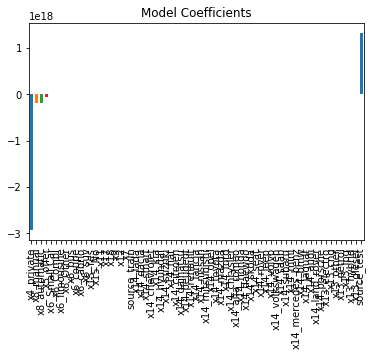

In [161]:

predictors = [x for x in train1.columns if x not in [target]+IDcol]
print("predictors : ",predictors)
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train1, test1, predictors, target, IDcol, 'linear_reg.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

### Lasso 


Model Report
RMSE : 4057


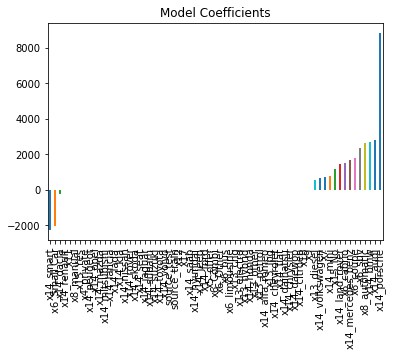

In [162]:
predictors = [x for x in train1.columns if x not in [target]+IDcol]
# print predictors
alg1 = Lasso(alpha = 1,normalize=True)
modelfit(alg1, train1, test1, predictors, target, IDcol, 'lasso.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

### ElasticNet


Model Report
RMSE : 3857


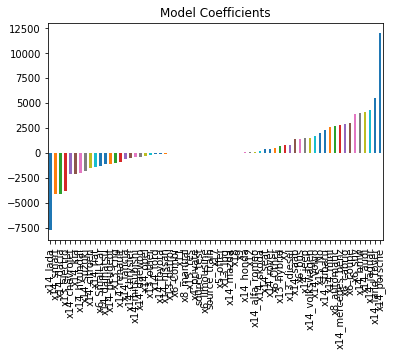

In [163]:
predictors = [x for x in train1.columns if x not in [target]+IDcol]
# print predictors
alg1 = ElasticNet(alpha=0.01,l1_ratio=1,normalize=True)
modelfit(alg1, train1, test1, predictors, target, IDcol, 'elasticNet.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

### KNN Regression

In [165]:
predictors = [x for x in train1.columns if x not in [target]+IDcol]
for i in range(1,10):
    alg1 = KNeighborsRegressor(n_neighbors=i)
    modelfit(alg1, train1, test1, predictors, target, IDcol, 'kneighbour.csv')


Model Report
RMSE : 112.1

Model Report
RMSE : 2887

Model Report
RMSE : 3533

Model Report
RMSE : 3902

Model Report
RMSE : 4147

Model Report
RMSE : 4330

Model Report
RMSE : 4478

Model Report
RMSE : 4591

Model Report
RMSE : 4683


### Decision Tree Regression

In [172]:
predictors = [x for x in train1.columns if x not in [target]+IDcol]
alg1 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg1, train1, test1, predictors, target, IDcol, 'decisionTree.csv')


Model Report
RMSE : 2956


### Random Forest Regression

In [173]:
predictors = [x for x in train1.columns if x not in [target]+IDcol]
alg1 = RandomForestRegressor(n_estimators=100,max_depth=15, min_samples_leaf=60)
modelfit(alg1, train1, test1, predictors, target, IDcol, 'randomForest.csv')


Model Report
RMSE : 2774


### ADA Boosting

In [174]:
predictors = [x for x in train1.columns if x not in [target]+IDcol]
alg1 = AdaBoostRegressor(n_estimators=200)
modelfit(alg1, train1, test1, predictors, target, IDcol, 'adaBoost.csv')


Model Report
RMSE : 5010


### ADA Boosting with exponential loss


Model Report
RMSE : 3702


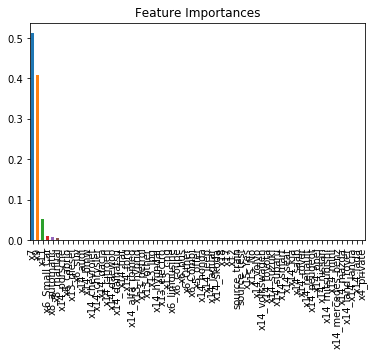

In [175]:
predictors = [x for x in train1.columns if x not in [target]+IDcol]
alg5 = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='exponential',
         n_estimators=100, random_state=None)
modelfit(alg5, train1, test1, predictors, target, IDcol, 'adaBoostExpo.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 3692


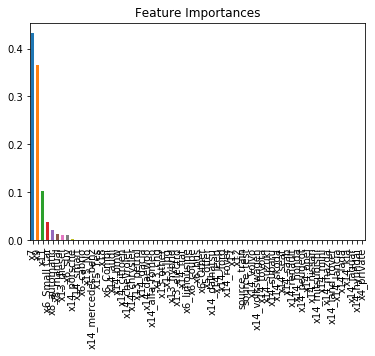

In [177]:
predictors = [x for x in train1.columns if x not in [target]+IDcol]
alg5 = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='exponential',
         n_estimators=200, random_state=None)
modelfit(alg5, train1, test1, predictors, target, IDcol, 'adaBoostExpo1.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

In [178]:
coef5.index[:5]

Index(['x7', 'x9', 'x11', 'x6_Small Car', 'x8_automatic'], dtype='object')

### ADA Boosting with fixed predictors


Model Report
RMSE : 3683


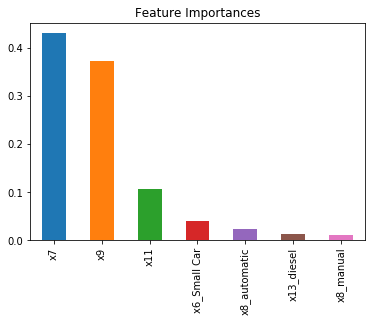

In [183]:
predictors=coef5.index[:7]
alg5 = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='exponential',
         n_estimators=200, random_state=None)
modelfit(alg5, train1, test1, predictors, target, IDcol, 'adaBoost_withPredictor.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

### XG Boosting


Model Report
RMSE : 2189


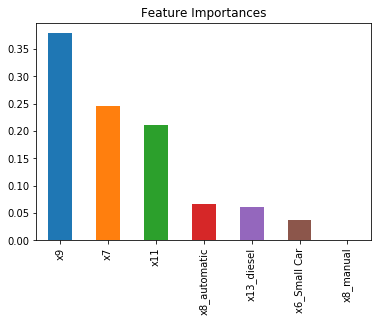

In [184]:
predictors = coef5.index[:7]
alg5 = xgb.XGBRegressor(max_depth=10, n_estimators=200, learning_rate=0.05)
modelfit(alg5, train1, test1, predictors, target, IDcol, 'xgboost_withPredictors.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

### XGBOOsting with parameters variation


Model Report
RMSE : 1976


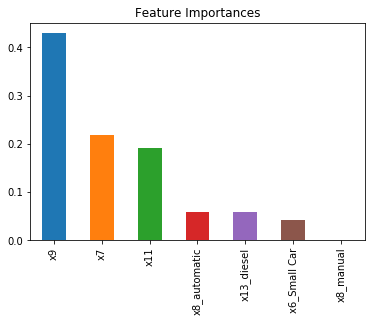

In [188]:
predictors = coef5.index[:7]
alg5 = xgb.XGBRegressor(max_depth=15, n_estimators=200, learning_rate=0.03)
modelfit(alg5, train1, test1, predictors, target, IDcol, 'xgboost_withPredictors1.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 2036


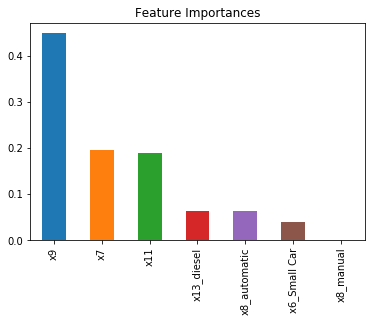

In [189]:
predictors = coef5.index[:7]
alg5 = xgb.XGBRegressor(max_depth=15, n_estimators=200, learning_rate=0.02)
modelfit(alg5, train1, test1, predictors, target, IDcol, 'xgboost_withPredictors2.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')